In [273]:
import pandas as pd
import numpy as np
import os
import warnings 
warnings.filterwarnings("ignore")

In [287]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/HMFMOLD.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [288]:
# esg 등급표 불러오기
df = pd.read_csv("data/esg 등급/2011_2022_ESGdata")
df.head(5)
# df.info()

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
0,AJ네트웍스,B,D,B,B,2022,095570
1,AK홀딩스,B+,B,B+,B+,2022,006840
2,BGF,A,A,A+,A,2022,027410
3,BGF리테일,A,A,A+,A,2022,282330
4,BNK금융지주,A+,A,A+,A+,2022,138930


In [289]:
# 11년부터 연속으로 있는 기업 목록 가져오기
from_11 = pd.read_csv("data/esg 등급/from_11.csv")
from_11

,0
0,AK홀딩스
1,BYC
2,CJ
3,CJ CGV
4,CJ대한통운
...,...
494,환인제약
495,황금에스티
496,효성
497,효성 ITX


In [290]:
# 수익률 가져오기
e_df = pd.read_csv("data/회사수익률.csv")
e_df.head(5)

,year,수익률,종목명
0,2015,NaN,AJ네트웍스
1,2016,-16.696604,AJ네트웍스
2,2017,-5.305182,AJ네트웍스
3,2018,-10.580189,AJ네트웍스
4,2019,-19.419833,AJ네트웍스


In [318]:
e_df = e_df[~(e_df["수익률"] > 200)]

In [319]:
# 연속으로 있는 기업만 남기기
df = df[df["기업명"].isin(from_11["0"].values)]
df

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
1,AK홀딩스,B+,B,B+,B+,2022,006840
5,BYC,B,D,B,B+,2022,001460
6,CJ,A,B+,A+,A,2022,001040
7,CJ CGV,A,B,A,A,2022,079160
8,CJ대한통운,A,A,A+,A,2022,000120
...,...,...,...,...,...,...,...
8729,풍산,B,B+,B,B+,2011,103140
8730,풍산홀딩스,B,B,B,E,2011,005810
8732,하나금융지주,B+,A+,B+,B,2011,086790
8734,서연,B,B,B,B,2018,007860


In [320]:
score_df = pd.DataFrame(index = from_11["0"].values)

In [321]:
# 연도별 종합등급에 따라 점수리스트 생성
total_score_lst = []
for i in range(2011, 2022):
    score_lst = [np.nan] * len(from_11["0"].values)
    for val, name in zip(df[df["연도"] == i]["종합등급"].values, df[df["연도"] == i]["기업명"].values):
        index = list(score_df.index).index(name)
        if val == "A+" :
            score_lst[index] = 6 
        elif val == "A" : 
            score_lst[index] = 5
        elif val == "B+" : 
            score_lst[index] = 4
        elif val == "B" : 
            score_lst[index] = 3
        elif val == "C" : 
            score_lst[index] = 2
        elif val == "D" : 
            score_lst[index] = 1
        elif val == "E" : 
            score_lst[index] = 0
    total_score_lst.append(score_lst)
print(total_score_lst[0])

[3, 3, 3, 3, 4, 0, 4, 0, 3, 3, 5, 3, 3, 3, 3, 0, 4, 0, 5, 3, 3, 3, 6, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 4, 5, 3, 5, 5, 5, 3, 3, 0, 4, 4, 0, 0, 5, 5, 0, 3, 3, 3, 3, 5, 3, 6, 4, 5, 4, 6, 6, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 4, 4, 3, 3, 3, 3, 3, 3, 0, 0, 5, 3, 3, 4, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 4, 3, 4, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 4, 3, 3, 5, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 5, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 6, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 4, 3, 3, 0, 6, 0, 6, 4, 6, 5, 3, 3, 5, 3, 4, 5, 0, 3, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 0, 0, 5, 0, 3, 3, 4, 3, 0, 3, 3, 3, 4, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 4, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 

In [322]:
# 연속으로 있는 기업명으로 비어있는 DataFrame 만들기
score_df = pd.DataFrame(index = from_11["0"].values)
# 기업명과 매치시켜서 DataFrame concat시키기
for i,val in enumerate(total_score_lst):
    score_df[i + 2011] = val
score_df.reset_index(drop=False,inplace = True)
score_df.tail(5)

,index,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
494,환인제약,3,3,3,3,3,3,3,3,3,3,3
495,황금에스티,3,3,3,3,3,3,3,3,1,1,2
496,효성,3,4,4,3,3,3,3,3,2,5,5
497,효성 ITX,3,0,3,3,3,3,3,3,3,4,4
498,후성,3,3,3,3,3,3,3,3,3,2,4


In [323]:
# 전년도와 비교해 종합등급의 등락 비교
total_lst = []
for i in range(2011, 2021):
    lst = []
    for j in score_df.index:
        lst.append(score_df.loc[j,i + 1] - score_df.loc[j,i])
    total_lst.append(lst)
total_lst

[[0,
  0,
  0,
  0,
  -1,
  3,
  0,
  0,
  0,
  -3,
  -1,
  0,
  0,
  0,
  0,
  3,
  -4,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  1,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  1,
  0,
  0,
  -2,
  0,
  0,
  0,
  -1,
  0,
  0,
  0,
  3,
  3,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  1,
  0,
  0,
  1,
  0,
  0,
  3,
  3,
  -1,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  -1,
  0,
  0,
  -1,
  0,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  -3,
  0,
  0,
  3,
  3,
  0,
  0,
  3,
  3,
  1,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  -3,
  3,
  3,
  1,
  3,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  3,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  -1,
  2,
  1,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  3,
 

In [324]:
# 기업명과 매치시켜서 DataFrame concat시키기
up_down_df = pd.DataFrame(index = from_11["0"].values)
for i,val in enumerate(total_lst):
    up_down_df[f"{i + 11}-{i+12}"] = val
up_down_df.reset_index(drop=False,inplace = True)
up_down_df.tail(5)

,index,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21
494,환인제약,0,0,0,0,0,0,0,0,0,0
495,황금에스티,0,0,0,0,0,0,0,-2,0,1
496,효성,1,0,-1,0,0,0,0,-1,3,0
497,효성 ITX,-3,3,0,0,0,0,0,0,1,0
498,후성,0,0,0,0,0,0,0,0,-1,2


In [325]:
# 수익률 데이터에 없는 기업 제외
up_down_df = up_down_df[up_down_df["index"].isin(e_df[e_df["year"]==2011]["종목명"].values)]
up_down_df.reset_index(drop=True, inplace=True)
up_down_df

,index,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21
0,AK홀딩스,0,0,0,0,0,0,0,0,1,0
1,BYC,0,0,0,0,0,0,0,0,0,0
2,CJ,0,1,0,0,0,1,0,0,0,0
3,CJ CGV,0,0,0,0,0,0,1,0,1,0
4,CJ대한통운,-1,1,0,0,1,-1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
490,환인제약,0,0,0,0,0,0,0,0,0,0
491,황금에스티,0,0,0,0,0,0,0,-2,0,1
492,효성,1,0,-1,0,0,0,0,-1,3,0
493,효성 ITX,-3,3,0,0,0,0,0,0,1,0


In [326]:
# 2020 ~ 2021 데이터
mat_df = pd.DataFrame(index = up_down_df["index"])
mat_df["변동"] = list(up_down_df["20-21"])

In [335]:
# 시각화할 2011-2012 esg등급변화와 2011의 수익률 데이터 붙이기
lst = []
for name in up_down_df["index"].values:
    val = e_df[(e_df["종목명"] == name) & (e_df["year"] == 2020)]["수익률"].values
    if list(val):
        lst.append(val[0])
    else:
        val = e_df[(e_df["종목명"] == name)]["수익률"].mean()
        lst.append(val)
mat_df["수익률"] = lst

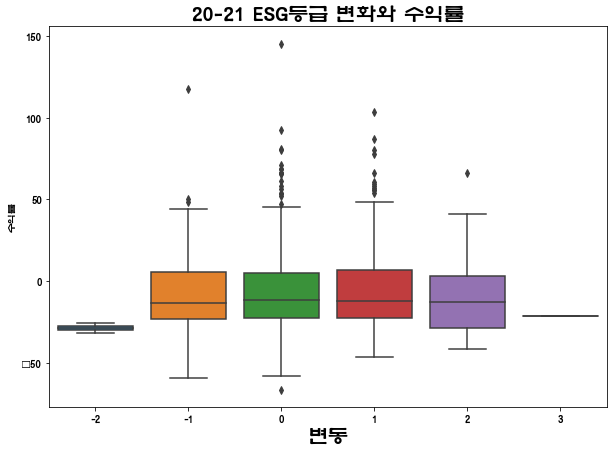

In [336]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)
plt.title("20-21 ESG등급 변화와 수익률", size = 20)
plt.xlabel("ESG점수", size = 20)
plt.xlabel("수익률", size = 20)
sns.boxplot(x = "변동", y = "수익률", data = mat_df);

In [ ]:
# 모든 등급 변화의 합
lst = []
for i in up_down_df.index:
    total = 0
    for j in range(1,len(up_down_df.columns)):
        total += up_down_df.iloc[i,j]
    lst.append(total)
mat_df["변동"] = lst

In [337]:
# 모든 수익률의 합
lst = []
for name in up_down_df["index"].values:
    total = 0
    for val in e_df[e_df["종목명"] == name]["수익률"].values:
        total += val
    lst.append(val)
mat_df["수익률"] = lst

<AxesSubplot:title={'center':'11-21 ESG등급 변화와 수익률'}, xlabel='변동', ylabel='수익률'>

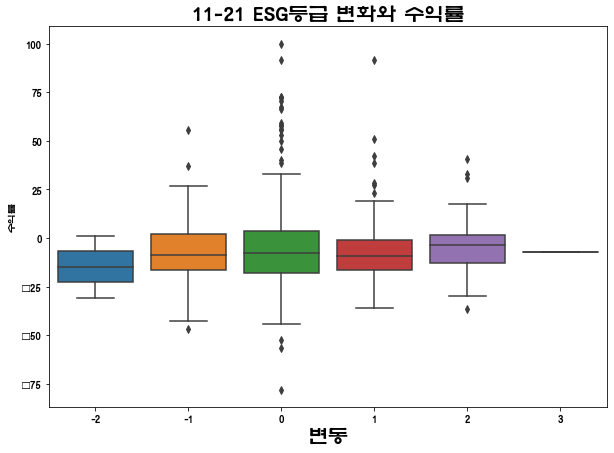

In [338]:
plt.title("11-21 ESG등급 변화와 수익률", size = 20)
plt.xlabel("ESG점수", size = 20)
plt.xlabel("수익률", size = 20)
sns.boxplot(x = "변동", y = "수익률", data = mat_df)

15.236993647604018